# Research articles vs datasets in chemistry and materials science

In this notebook, we show how to retrieve meta information about papers and datasets to make a comparison between the number of research articles published in chemistry and materials science ([Web of Science Core Collection](https://www.webofscience.com/wos/woscc/basic-search)) and the number of datasets deposited in data repositories ([DataCite](https://commons.datacite.org/) and [ZENODO](https://zenodo.org/)) from 1996 to 2023.

## Example of data collection using the Web of Science API

```{margin}
You need to add your Web of Science API key to the `.env` file. The access to this API has different plans that you can find in the [APIs page](https://developer.clarivate.com/apis) of Web of Science.
```

In [ ]:
import os
import pandas as pd
import requests
import urllib.parse
import json
import time
import matextract  # noqa: F401

##### Create a function to request data from Web of Science

In [2]:
def wos_api_request(i, query, wos_data):
    request = requests.get(
        f"https://api.clarivate.com/apis/wos-starter/v1/documents?db=WOS&q=TS=({urllib.parse.quote(query)})&"
        f"&limit=50&page={i+1}",
        headers={"X-APIKey": os.environ["WOS_API_KEY"]},
    )
    try:
        for wos_record in request.json()["hits"]:
            wos_data.append(wos_record)
    except (
        requests.exceptions.ConnectionError,
        requests.exceptions.JSONDecodeError,
        KeyError,
    ):
        print(f"Resending WoS API request #{i+1}")
        time.sleep(100)
        wos_api_request(i, query, wos_data)

##### Create a function to get Article and Data Paper document types published between 1996 and 2023

In [4]:
def process_data(wos_data):
    years = []

    for paper in wos_data:
        if "Article" in paper["types"] or "Data Paper" in paper["types"]:
            if 1996 <= int(paper["source"]["publishYear"]) <= 2023:
                pub_year = int(paper["source"]["publishYear"])
                if len(years) == 0:
                    years.append(
                        {
                            "publication_year": pub_year,
                            "wos_documents": 1,
                        }
                    )
                else:
                    for year in years:
                        if year["publication_year"] == pub_year:
                            year["wos_documents"] += 1
                            break
                    else:
                        years.append(
                            {
                                "publication_year": pub_year,
                                "wos_documents": 1,
                            }
                        )
    return years

##### Create a function to save the results in a `.csv` file

In [5]:
def save_results(file_name, years):
    years.sort(reverse=True, key=lambda years: years["wos_documents"])

    df = pd.DataFrame(data=years)
    column_names = {
        "publication_year": "publication_year",
        "wos_documents": "wos_documents",
    }
    df.rename(columns=column_names, inplace=True)

    df.to_csv(f"./wos_results/{file_name}.csv", sep=";", index=False)

### Example of data collection on "thermoelectric materials"

As an example, we extract from the Web of Science Core Collection the papers published on **thermoelectric materials**.

In [6]:
wos_data = []

In [7]:
query = "thermoelectric AND materials"

We send an initial WoS API request to assess the number of requests required to extract all the papers in this topic. From the initial response, we extract the total number of records found.

In [8]:
initial_wos_response = requests.get(
    f"https://api.clarivate.com/apis/wos-starter/v1/documents?db=WOS&q=TS=({urllib.parse.quote(query)})&"
    f"&limit=50&page=1",
    headers={"X-APIKey": os.environ["WOS_API_KEY"]},
)
data = initial_wos_response.json()
print(f"Number of papers from the query ({query}): {data['metadata']['total']}")

Number of papers from the query (thermoelectric AND materials): 29704


With the total number of records, we calculate the number of requests required.

In [9]:
wos_requests_required = ((data["metadata"]["total"] - 1) // 50) + 1
print(f"Number of requests required: {wos_requests_required}")

Number of requests required: 595


Now we can extract the papers from WoS. This can take several minutes, depending on the total number of records to be collected.

In [10]:
for i in range(wos_requests_required + 1):
    wos_api_request(i, query, wos_data)
    print(
        f"{(((i + 1) * 100) / wos_requests_required):.1f}% of WoS API requests complete"
    )

0.2% of WoS API requests complete
0.3% of WoS API requests complete
0.5% of WoS API requests complete
0.7% of WoS API requests complete
0.8% of WoS API requests complete
1.0% of WoS API requests complete
1.2% of WoS API requests complete
1.3% of WoS API requests complete
1.5% of WoS API requests complete
1.7% of WoS API requests complete
1.8% of WoS API requests complete
2.0% of WoS API requests complete
2.2% of WoS API requests complete
2.4% of WoS API requests complete
2.5% of WoS API requests complete
2.7% of WoS API requests complete
2.9% of WoS API requests complete
3.0% of WoS API requests complete
3.2% of WoS API requests complete
3.4% of WoS API requests complete
3.5% of WoS API requests complete
3.7% of WoS API requests complete
3.9% of WoS API requests complete
4.0% of WoS API requests complete
4.2% of WoS API requests complete
4.4% of WoS API requests complete
4.5% of WoS API requests complete
4.7% of WoS API requests complete
4.9% of WoS API requests complete
5.0% of WoS AP

39.8% of WoS API requests complete
40.0% of WoS API requests complete
40.2% of WoS API requests complete
40.3% of WoS API requests complete
40.5% of WoS API requests complete
40.7% of WoS API requests complete
40.8% of WoS API requests complete
41.0% of WoS API requests complete
41.2% of WoS API requests complete
41.3% of WoS API requests complete
41.5% of WoS API requests complete
41.7% of WoS API requests complete
41.8% of WoS API requests complete
42.0% of WoS API requests complete
42.2% of WoS API requests complete
42.4% of WoS API requests complete
42.5% of WoS API requests complete
42.7% of WoS API requests complete
42.9% of WoS API requests complete
43.0% of WoS API requests complete
43.2% of WoS API requests complete
43.4% of WoS API requests complete
43.5% of WoS API requests complete
43.7% of WoS API requests complete
43.9% of WoS API requests complete
44.0% of WoS API requests complete
44.2% of WoS API requests complete
44.4% of WoS API requests complete
44.5% of WoS API req

79.3% of WoS API requests complete
79.5% of WoS API requests complete
79.7% of WoS API requests complete
79.8% of WoS API requests complete
80.0% of WoS API requests complete
80.2% of WoS API requests complete
80.3% of WoS API requests complete
80.5% of WoS API requests complete
80.7% of WoS API requests complete
80.8% of WoS API requests complete
81.0% of WoS API requests complete
81.2% of WoS API requests complete
81.3% of WoS API requests complete
81.5% of WoS API requests complete
81.7% of WoS API requests complete
81.8% of WoS API requests complete
82.0% of WoS API requests complete
82.2% of WoS API requests complete
82.4% of WoS API requests complete
82.5% of WoS API requests complete
82.7% of WoS API requests complete
82.9% of WoS API requests complete
83.0% of WoS API requests complete
83.2% of WoS API requests complete
83.4% of WoS API requests complete
83.5% of WoS API requests complete
83.7% of WoS API requests complete
83.9% of WoS API requests complete
84.0% of WoS API req

We obtain a list of dictionaries including all the records extracted (as an example, the data for the first paper is shown below). We can save these raw results in a `.json` file. 

In [11]:
wos_data[0]

{'uid': 'WOS:000187876000038',
 'title': 'A critical study of the thermoelectric method of measuring vapor pressure',
 'types': ['Article'],
 'sourceTypes': ['Article'],
 'source': {'sourceTitle': 'JOURNAL OF BIOLOGICAL CHEMISTRY',
  'publishYear': 1938,
  'publishMonth': 'NOV',
  'volume': '126',
  'issue': '1',
  'pages': {'range': '349-360', 'begin': '349', 'end': '360', 'count': 12}},
 'names': {'authors': [{'displayName': 'Roepke, RR',
    'wosStandard': 'Roepke, RR',
    'researcherId': 'FXG-1059-2022'},
   {'displayName': 'Baldes, EJ',
    'wosStandard': 'Baldes, EJ',
    'researcherId': 'EKH-9490-2022'}]},
 'links': {'record': 'https://www.webofscience.com/api/gateway?GWVersion=2&SrcApp=incarcsic_woslite&SrcAuth=WosAPI&KeyUT=WOS:000187876000038&DestLinkType=FullRecord&DestApp=WOS_CPL',
  'citingArticles': 'https://www.webofscience.com/api/gateway?GWVersion=2&SrcApp=incarcsic_woslite&SrcAuth=WosAPI&KeyUT=WOS:000187876000038&DestLinkType=CitingArticles&DestApp=WOS_CPL',
  'refere

In [12]:
with open("wos_data_output.json", "w") as file:
    json.dump(wos_data, file)

In [13]:
with open("wos_data_output.json") as file:
    wos_data = json.load(file)

In [14]:
len(wos_data)

29704

We process the obtained data with the function `process_data` and save the results in a `.csv` file with the function `save_results`.

In [15]:
years = process_data(wos_data)
save_results("thermoelectric", years)

papers = 0
for year in years:
    papers += year["wos_documents"]
print(
    f"Number of papers published between 1996 and 2023 from the query ({query}): {papers}"
)

Number of papers published between 1996 and 2023 from the query (thermoelectric AND materials): 22867


Following this procedure, we have extracted from **WoS** the data on published papers (Articles and Data Papers) for the main categories of materials studied in chemistry. Using the corresponding APIs, we can also extract the number of datasets published in the **DataCite** and **ZENODO** repositories for the same categories.

## Collecting the saved data for all categories from WoS, DataCite and ZENODO

In this section, we prepare the collected data on papers and datasets to plot the results as a function of the categories and publication years.

In [3]:
from glob import glob

In [4]:
all_results = glob("./wos_results/*.csv")
print(f"files found: {len(all_results)}")

files found: 9


In [5]:
all_results

['./wos_results/nanoparticles.csv',
 './wos_results/polymers.csv',
 './wos_results/mofs.csv',
 './wos_results/photocatalytic.csv',
 './wos_results/biomaterials.csv',
 './wos_results/thermoelectric.csv',
 './wos_results/battery_cathode.csv',
 './wos_results/2Dmaterials.csv',
 './wos_results/semiconductor.csv']

We create a `.csv` file combining the results of the different categories.

In [6]:
df = pd.read_csv(all_results[0], sep=";")
df.head()

publication_year  wos_documents
0              2023          76010
1              2022          79936
2              2021          73154
3              2020          75213
4              2019          70984

In [7]:
df = df.sort_values(by="publication_year").reset_index(drop=True)
df_results = pd.DataFrame(df["publication_year"].reset_index(drop=True)).copy()
df_results.head()

publication_year
0              1996
1              1997
2              1998
3              1999
4              2000

In [8]:
materials_name = [
    "nanoparticles",
    "battery_cathode",
    "photocatalytic",
    "polymers",
    "thermoelectric",
    "mofs",
    "biomaterials",
    "2Dmaterials",
    "semiconductor",
]

In [9]:
for file in materials_name:
    df = pd.read_csv(f"./wos_results/{file}.csv", sep=";")
    df = df.sort_values(by="publication_year").reset_index(drop=True)
    df = df.rename(columns={"wos_documents": file})
    df_results = pd.merge(df_results, df)

In [10]:
df_results.head()

publication_year  nanoparticles  battery_cathode  photocatalytic  polymers   
0              1996            312               49              15     12406  \
1              1997            454               56              18     12661   
2              1998            749               97              25     13879   
3              1999           1022              121              28     14713   
4              2000           1298              160              27     15088   

   thermoelectric  mofs  biomaterials  2Dmaterials  semiconductor  
0             142    30           233          121            570  
1             146    44           240          137            654  
2             212    37           294          164            695  
3             226    47           347          178            721  
4             294    45           345          188            666

In [11]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   publication_year  28 non-null     int64
 1   nanoparticles     28 non-null     int64
 2   battery_cathode   28 non-null     int64
 3   photocatalytic    28 non-null     int64
 4   polymers          28 non-null     int64
 5   thermoelectric    28 non-null     int64
 6   mofs              28 non-null     int64
 7   biomaterials      28 non-null     int64
 8   2Dmaterials       28 non-null     int64
 9   semiconductor     28 non-null     int64
dtypes: int64(10)
memory usage: 2.3 KB


In [12]:
df_results.to_csv("wos_materials_papers.csv", sep=",", index=False)

## Plot the number of research papers vs. datasets deposited in data repositories in chemistry and materials science per year

### Load data on papers from Web of Science 

In [13]:
df_wos = pd.read_csv("wos_materials_papers.csv", sep=",")
df_wos.head()

publication_year  nanoparticles  battery_cathode  photocatalytic  polymers   
0              1996            312               49              15     12406  \
1              1997            454               56              18     12661   
2              1998            749               97              25     13879   
3              1999           1022              121              28     14713   
4              2000           1298              160              27     15088   

   thermoelectric  mofs  biomaterials  2Dmaterials  semiconductor  
0             142    30           233          121            570  
1             146    44           240          137            654  
2             212    37           294          164            695  
3             226    47           347          178            721  
4             294    45           345          188            666

### Load data on DataCite datasets

In [14]:
df_datacite = pd.read_csv("datacite_datasets.csv", sep=";")
df_datacite.head()

publication_year  nanoparticles  battery_cathode  photocatalytic  polymers   
0              2010             17              NaN             NaN        11  \
1              2011             36              NaN             NaN         4   
2              2012             30              NaN             NaN        41   
3              2013             52              NaN             NaN        12   
4              2014            148              1.0             1.0        53   

   thermoelectric  mofs  biomaterials  2Dmaterials  semiconductor  
0             NaN     1             1            2            NaN  
1             1.0     1             2            4            NaN  
2             NaN     1             2            4            NaN  
3             1.0     1             2          139            1.0  
4             1.0     3             8           33            1.0

### Load data on ZENODO datasets

In [15]:
df_zenodo = pd.read_csv("zenodo_datasets.csv", sep=";")
df_zenodo.head()

publication_year  nanoparticles  battery_cathode  photocatalytic  polymers   
0              2010            NaN              NaN             NaN       NaN  \
1              2011            NaN              NaN             NaN       NaN   
2              2012            2.0              NaN             NaN       1.0   
3              2013            NaN              NaN             NaN       NaN   
4              2014            NaN              NaN             NaN       2.0   

   thermoelectric  mofs  biomaterials  2Dmaterials  semiconductor  
0             NaN   NaN           1.0          NaN            NaN  
1             NaN   NaN           NaN          NaN            NaN  
2             NaN   NaN           NaN          NaN            NaN  
3             NaN   NaN           NaN          NaN            NaN  
4             NaN   1.0           NaN          NaN            NaN

### Unify labels and colors

In [16]:
labels = [
    "nanoparticles",
    "battery cathode materials",
    "photocatalytic materials",
    "polymers",
    "thermoelectric materials",
    "MOFs",
    "biomaterials",
    "2D materials",
    "semiconductor materials",
]

In [17]:
colors = [
    "#1a4a81",
    "#2166ac",
    "#4393c3",
    "#92c5de",
    "#c2e1f2",
    "#f4a582",
    "#d6604d",
    "#b2182b",
    "#67001f",
]

### Plot WoS chemistry and materials science papers vs. year using `plotly.express`

In [18]:
import plotly.express as px

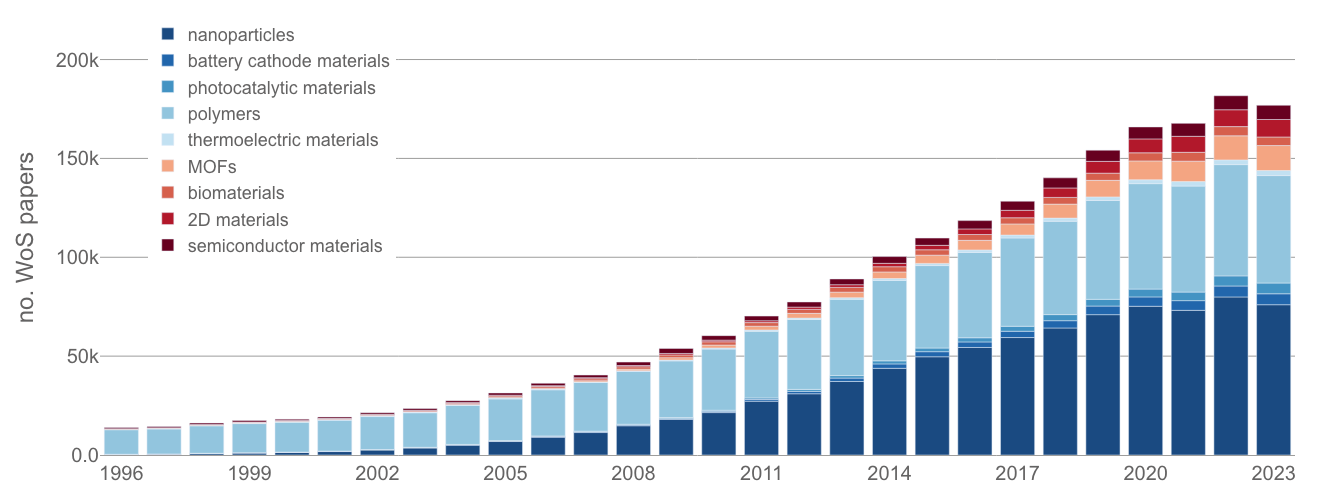

In [19]:
fig = px.bar(
    data_frame=df_wos,
    x="publication_year",
    y=df_wos.columns[1:],
    barmode="relative",
    color_discrete_sequence=colors,
)

for i, trace in enumerate(fig.data):
    trace.update(name=labels[i])

fig.update_layout(
    {"plot_bgcolor": "#FFFFFF", "paper_bgcolor": "#FFFFFF"},
    width=900,
    height=500,
    margin=dict(l=100, r=40, t=20, b=45),
    font_family="Arial",
    font_color="#646363",
    font_size=20,
    title_font_family="Arial",
    title_font_color="#646363",
    legend_title_text=None,
    legend=dict(font={"size": 18}, yanchor="bottom", y=0.44, xanchor="left", x=0.04),
)

fig.update_yaxes(
    title_text="no. WoS papers",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 24}},
    range=(0, 220000),
    tickformat=".2s",
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
)

fig

### Plot DataCite datasets papers vs. year using `plotly.express`

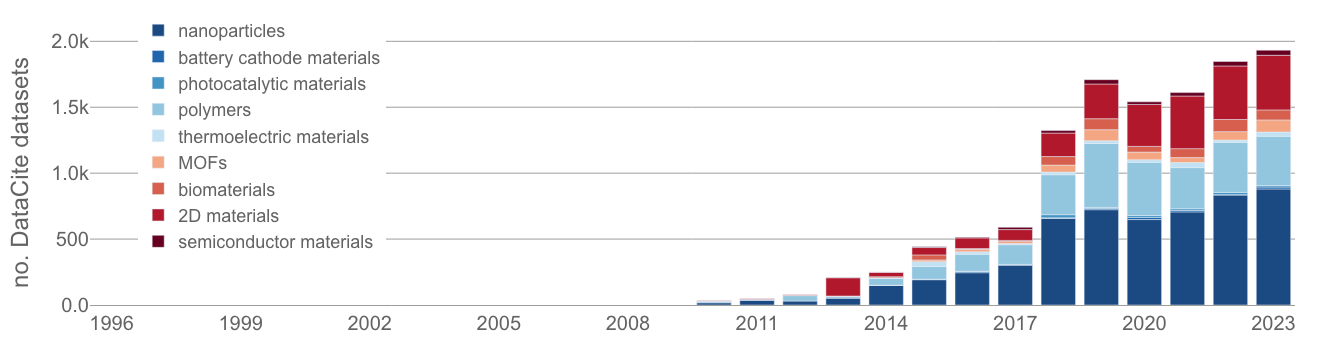

In [20]:
fig = px.bar(
    data_frame=df_datacite,
    x="publication_year",
    y=df_datacite.columns[1:],
    barmode="relative",
    color_discrete_sequence=colors,
)

for i, trace in enumerate(fig.data):
    trace.update(name=labels[i])

fig.update_layout(
    {"plot_bgcolor": "#FFFFFF", "paper_bgcolor": "#FFFFFF"},
    width=900,
    height=350,
    margin=dict(l=90, r=40, t=30, b=45),
    font_family="Arial",
    font_color="#646363",
    font_size=20,
    title_font_family="Arial",
    title_font_color="#646363",
    legend_title_text=None,
    legend=dict(font={"size": 18}, yanchor="bottom", y=0.17, xanchor="left", x=0.04),
)

fig.update_yaxes(
    title_text="no. DataCite datasets",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 24}},
    range=(0, 2010),
    tickformat=".2s",
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
)

fig

### Plot ZENODO datasets papers vs. year using `plotly.express`

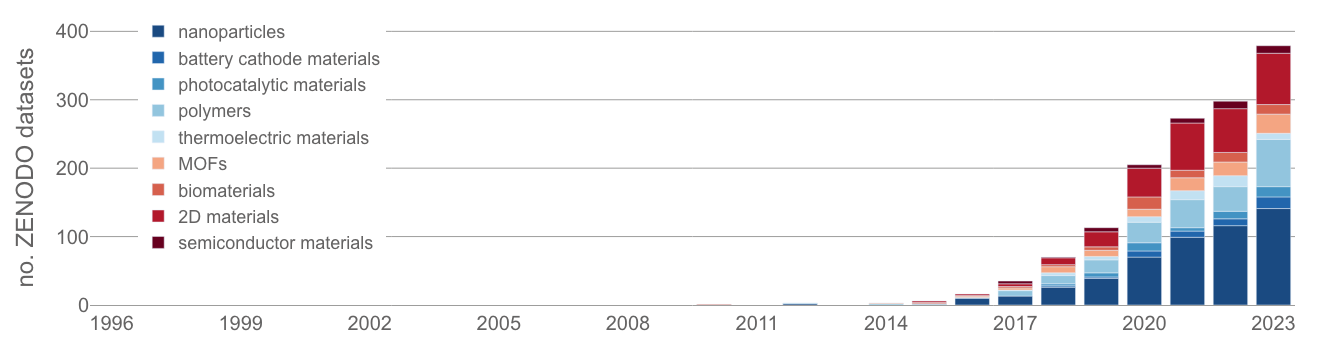

In [21]:
fig = px.bar(
    data_frame=df_zenodo,
    x="publication_year",
    y=df_zenodo.columns[1:],
    barmode="relative",
    color_discrete_sequence=colors,
)

for i, trace in enumerate(fig.data):
    trace.update(name=labels[i])

fig.update_layout(
    {"plot_bgcolor": "#FFFFFF", "paper_bgcolor": "#FFFFFF"},
    width=900,
    height=350,
    margin=dict(l=90, r=40, t=30, b=45),
    font_family="Arial",
    font_color="#646363",
    font_size=20,
    title_font_family="Arial",
    title_font_color="#646363",
    legend_title_text=None,
    legend=dict(font={"size": 18}, yanchor="bottom", y=0.16, xanchor="left", x=0.04),
)

fig.update_yaxes(
    title_text="no. ZENODO datasets",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 24}},
    range=(0, 402),
    tickformat="000",
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
)

fig

## Plot Figure 1 with combined sub-plots using `plotly.graph_objects`

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

##### Rearrange dataframes using `pandas.melt` to be able to use `pandas.DataFrame.groupby`

In [23]:
df_wos_rearranged = df_wos.melt(
    id_vars="publication_year", var_name="materials", value_name="no_papers"
)
df_wos_rearranged.head()

publication_year      materials  no_papers
0              1996  nanoparticles        312
1              1997  nanoparticles        454
2              1998  nanoparticles        749
3              1999  nanoparticles       1022
4              2000  nanoparticles       1298

In [24]:
df_datacite_rearranged = df_datacite.melt(
    id_vars="publication_year", var_name="materials", value_name="no_papers"
)
df_datacite_rearranged.head()

publication_year      materials  no_papers
0              2010  nanoparticles       17.0
1              2011  nanoparticles       36.0
2              2012  nanoparticles       30.0
3              2013  nanoparticles       52.0
4              2014  nanoparticles      148.0

In [25]:
df_zenodo_rearranged = df_zenodo.melt(
    id_vars="publication_year", var_name="materials", value_name="no_papers"
)
df_zenodo_rearranged.head()

publication_year      materials  no_papers
0              2010  nanoparticles        NaN
1              2011  nanoparticles        NaN
2              2012  nanoparticles        2.0
3              2013  nanoparticles        NaN
4              2014  nanoparticles        NaN

In [26]:
colors_dict = dict(
    map(lambda i, j: (i, j), df_wos_rearranged["materials"].unique(), colors)
)
colors_dict

{'nanoparticles': '#1a4a81',
 'battery_cathode': '#2166ac',
 'photocatalytic': '#4393c3',
 'polymers': '#92c5de',
 'thermoelectric': '#c2e1f2',
 'mofs': '#f4a582',
 'biomaterials': '#d6604d',
 '2Dmaterials': '#b2182b',
 'semiconductor': '#67001f'}

### Plot combined figure WoS - DataCite - ZENODO

First, we set up the combined plot.

In [27]:
data_wos = [
    go.Bar(
        name=group,
        x=dfg["publication_year"],
        y=dfg["no_papers"],
        marker_color=colors_dict[group],
    )
    for group, dfg in df_wos_rearranged.groupby(by="materials", sort=False)
]

fig_wos = go.Figure(data=data_wos)
for i, trace in enumerate(fig_wos.data):
    trace.update(name=labels[i])

data_datacite = [
    go.Bar(
        name=group,
        x=dfg["publication_year"],
        y=dfg["no_papers"],
        marker_color=colors_dict[group],
        hovertemplate="%{y:.0f}",
    )
    for group, dfg in df_datacite_rearranged.groupby(by="materials", sort=False)
]

fig_datacite = go.Figure(data=data_datacite)
for i, trace in enumerate(fig_datacite.data):
    trace.update(name=labels[i])

data_zenodo = [
    go.Bar(
        name=group,
        x=dfg["publication_year"],
        y=dfg["no_papers"],
        marker_color=colors_dict[group],
        hovertemplate="%{y:.0f}",
    )
    for group, dfg in df_zenodo_rearranged.groupby(by="materials", sort=False)
]

fig_zenodo = go.Figure(data=data_zenodo)
for i, trace in enumerate(fig_zenodo.data):
    trace.update(name=labels[i])

fig = make_subplots(rows=3, cols=1, row_heights=[0.7, 0.3, 0.3], vertical_spacing=0.1)

for t in fig_wos.data:
    fig.append_trace(t, row=1, col=1)
for t in fig_datacite.data:
    fig.append_trace(t, row=2, col=1)
for t in fig_zenodo.data:
    fig.append_trace(t, row=3, col=1)

Then, we make cosmetic edits to the plot.

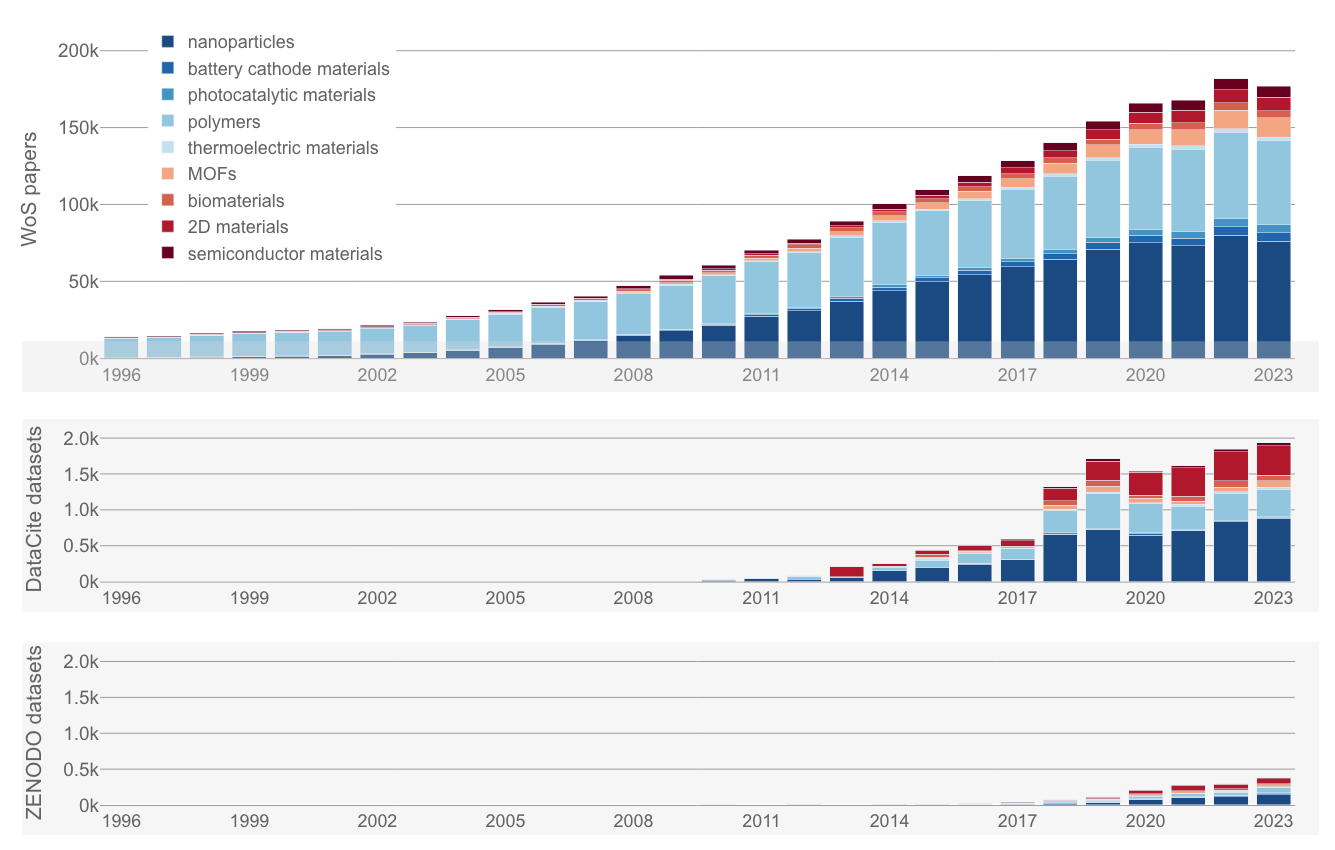

In [28]:
fig.update_layout(
    {"plot_bgcolor": "#FFFFFF", "paper_bgcolor": "#FFFFFF"},
    barmode="stack",
    width=900,
    height=850,
    margin=dict(l=100, r=40, t=20, b=45),
    font_family="Arial",
    font_color="#646363",
    font_size=18.9,
    title_font_family="Arial",
    title_font_color="#646363",
    legend_title_text=None,
    legend=dict(
        {"traceorder": "normal"},
        font={"size": 18},
        yanchor="bottom",
        y=0.68,
        xanchor="left",
        x=0.04,
    ),
)

fig.update_traces(showlegend=False, row=2, col=1)
fig.update_traces(showlegend=False, row=3, col=1)

tickvals = [*range(0, 220000, 50000)]
ticktext = ["0k", "50k", "100k", "150k", "200k"]
fig.update_yaxes(
    title_text="WoS papers",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 21}},
    range=(0, 220000),
    tickvals=tickvals,
    ticktext=ticktext,
    tickformat=".2s",
    row=1,
    col=1,
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickfont=dict(size=17.9),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
    row=1,
    col=1,
)

tickvals = [*range(0, 2020, 500)]
ticktext = ["0k", "0.5k", "1.0k", "1.5k", "2.0k"]
fig.update_yaxes(
    title_text="DataCite datasets",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 21}},
    range=(0, 2020),
    tickvals=tickvals,
    ticktext=ticktext,
    tickformat=".2s",
    row=2,
    col=1,
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickfont=dict(size=17.9),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
    row=2,
    col=1,
)

fig.update_yaxes(
    title_text="ZENODO datasets",
    showgrid=True,
    gridcolor="#9D9D9C",
    title={"font": {"size": 21}},
    range=(0, 2020),
    tickvals=tickvals,
    ticktext=ticktext,
    tickformat=".2s",
    row=3,
    col=1,
)
fig.update_xaxes(
    title_text=None,
    linecolor="#9D9D9C",
    range=(1995.5, 2023.5),
    tickfont=dict(size=17.9),
    tickvals=[1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020, 2023],
    row=3,
    col=1,
)

fig.add_shape(
    type="rect",
    xref="x domain",
    yref="y domain",
    x0=-0.065,
    y0=-0.1,
    x1=1.02,
    y1=0.05,
    line_width=0,
    fillcolor="#d9d9d9",
    opacity=0.3,
    layer="above",
)
fig.add_shape(
    type="rect",
    xref="x domain",
    yref="y domain",
    x0=-0.065,
    y0=-0.75,
    x1=1.02,
    y1=-0.18,
    line_width=0,
    fillcolor="#d9d9d9",
    opacity=0.25,
    layer="below",
)
fig.add_shape(
    type="rect",
    xref="x domain",
    yref="y domain",
    x0=-0.065,
    y0=-1.41,
    x1=1.02,
    y1=-0.84,
    line_width=0,
    fillcolor="#d9d9d9",
    opacity=0.25,
    layer="below",
)

fig